In [1]:
from src.simulation import Property, Mortgage, Simulator
import numpy as np
import pandas as pd
from src.rate_scraper import get_rate_distribution


_property = Property(purchase_price=394_900, tax_rate=0.019, annual_insurance_cost=1_800)
res = {}
for ltv in np.arange(0.80, 0.97, 0.01).round(2):
    rates = get_rate_distribution(
        price=_property.purchase_price,
        loan_amount=int(_property.purchase_price * ltv),
        minfico=760,
        maxfico=760,
        state="TX",
        rate_structure="fixed",
        loan_term=30,
        loan_type="conf",
    )
    mortgage = Mortgage(term_months=360, amount=_property.purchase_price * ltv, interest_rate=rates.idxmax())
    sim = Simulator(property=_property, mortgage=mortgage, holding_period_months=60)
    res[ltv] = sim.irr
res = pd.Series(res, name="irr")
res.index.name = "ltv"

2021-09-19 15:18.32 [info     ] GETting rates...               loan_amount=315920 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394900 rate_structure=fixed state=TX
2021-09-19 15:18.33 [info     ] GETting rates...               loan_amount=319869 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394900 rate_structure=fixed state=TX
2021-09-19 15:18.33 [info     ] GETting rates...               loan_amount=323818 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394900 rate_structure=fixed state=TX
2021-09-19 15:18.33 [info     ] GETting rates...               loan_amount=327767 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394900 rate_structure=fixed state=TX
2021-09-19 15:18.34 [info     ] GETting rates...               loan_amount=331716 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394900 rate_structure=fixed state=TX
2021-09-19 15:18.34 [info     ] GETting rates...               loan_amount=335665 loan_term=30 loan_type=conf maxfi

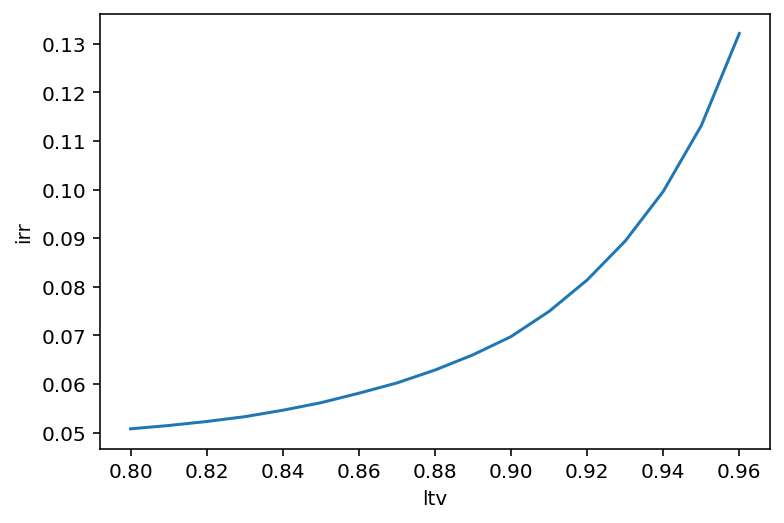

In [12]:
ax = res.plot()
ax.set_ylabel(res.name);

In [4]:
from src.rate_scraper import sweep

rates = sweep(price=394_000, fico=760, min_loan_to_value=0.8)

2021-09-19 16:08.50 [info     ] GETting rates...               loan_amount=315200 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394000 rate_structure=fixed state=TX
2021-09-19 16:08.51 [info     ] GETting rates...               loan_amount=319140 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394000 rate_structure=fixed state=TX
2021-09-19 16:08.51 [info     ] GETting rates...               loan_amount=323080 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394000 rate_structure=fixed state=TX
2021-09-19 16:08.52 [info     ] GETting rates...               loan_amount=327020 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394000 rate_structure=fixed state=TX
2021-09-19 16:08.53 [info     ] GETting rates...               loan_amount=330960 loan_term=30 loan_type=conf maxfico=760 minfico=760 price=394000 rate_structure=fixed state=TX
2021-09-19 16:08.53 [info     ] GETting rates...               loan_amount=334900 loan_term=30 loan_type=conf maxfi

<AxesSubplot:xlabel='loan_to_value', ylabel='interest_rate'>

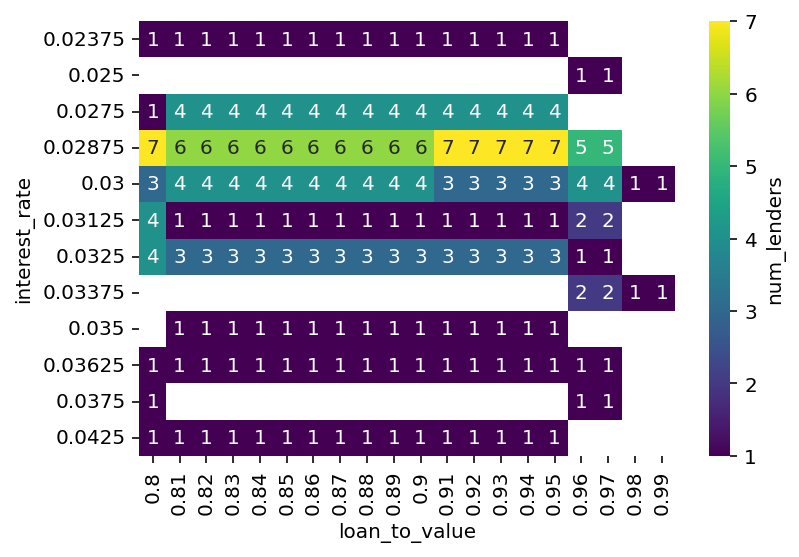

In [7]:
import seaborn as sns

sns.heatmap(rates, cmap="viridis", annot=True, cbar_kws={"label": "num_lenders"});

In [3]:
rates

interest_rate
0.03375    2
0.02875    5
0.03250    1
0.03125    2
0.03000    4
0.03625    1
0.03750    1
0.02500    1
Name: num_lenders, dtype: int64